<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/K_nearest_neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import imageio as imio
import matplotlib.pyplot as plt

Si tienes algún error al ejecutar la celda anterior verifica que tu ambiente de anaconda tenga las librerías necesarias.

# Clasificación con K-nearest neighbors
En este notebook vamos a implementar K-nearest neighbor, nuestro algoritmo va a **clasificar** a que raza pertenece la imagen de un perro, para entrenar nuestro algoritmo vamos a utilizar un set de datos contiene imagenes de 120 razas de perros, en total son 10,222 imagenes.

Data: [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/data)

#### Pre-procesamiento

El pre-procesamiento ya fue realizado y el dataset preparado y esta listo para usarse, para esto se aplico un proceso conocido como "transfer learning" usando la red neuronal "Inception" de Google(tema a cubrirse en proximas clases)  , para esta tarea ignoremos este detalle  y pensemos que se nos da un dataset con features donde cada columna representa una característica de entrada importante,pero no nos interesa conocer los detalles. 

Estas features/características fueron almacenadas en un matriz de numpy.

En esta parte del notebook solo hay que ejecutar las celdas para cargar los datos, estos datos van a servir de entrada para nuestra implementación de K-nearest neighbors con tensorflow.

### Referencias opcionales para transfer learning y "Google inception"
##### Inception
https://www.tensorflow.org/tutorials/image_recognition

https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html

##### Transfer Learning
https://www.datacamp.com/community/tutorials/transfer-learning

In [3]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [4]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array,allow_pickle=True)
training_set_dict['label'] = np.load(training_image_labels_array,allow_pickle=True)
training_set_dict['features'] = np.load(images_inception_features,allow_pickle=True)


#  K-Nearest Neighbors

La data la vamos a manejar en los siguientes 3 arreglos: 

- features    : features de la imagen dadas por google Inception
- labels      : label de la imagen, identifica que raza es
- images_name : nombre de la imgen original, si descargan el dataset con link en la descripcion pueden buscar la imagen original por este nombre.

In [5]:
## Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [6]:
len(features)


10222

Las labels pertenecientes a las features tienen el mismo indice, Ejemplo:

Label:  dingo
Features:  [0.17375451 0.52245414 0.071966   ... 0.10223776 0.21528146 0.35243738]
Nombre:  0120343862761d052d6a7ade81625c94


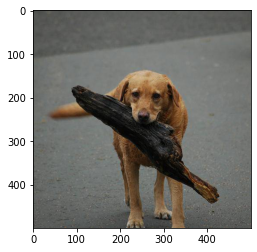

In [7]:
# Indice 4

print('Label: ',labels[43])
print('Features: ',features[43])
print('Nombre: ',images_name[43])

img = imio.imread('./data/train/'+images_name[4]+'.jpg')
plt.imshow(img)


### Implementa tu codigo de  K-Neighbors aqui:

El siguiente es un ejemplo de como puedes  definir tu función para predecir la raza sobre un punto x_predict ,a través de uscar los "k" vecinos mas cercanos en X_train y devolver como predicción el "y" que mas se repite(la moda) correspondiente a esos "k" valores de X_train , este "y" estará dado por Y_train.

Un ejemplo  de KNN en tensorflow: http://marubon-ds.blogspot.com/2017/09/knn-k-nearest-neighbors-by-tensorflow.html (este tiene diferencias, usar como guía no copiar literal, por ejemplo este usa una métrica de distancia diferente a la que debemos usar: distancia euclidiana )


#### Instrucciones:
1. Implementar KNN
2. Agregar el grafo de tensorboard
3. Ejecutar el modelo con las 2 imagenes de prueba.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
from tensorflow import keras

import datetime, os
from datetime import datetime

print(tf.__version__)

if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

%load_ext tensorboard

2.5.0
Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [45]:
class ClasificacionKnnL21:
  def __init__(self,k):
    tf.reset_default_graph()
    k = tf.summary.scalar("k",k)
    #xtrain = tf.placeholder("float", [None:2048]) 
    #xtest  = tf.placeholder("float", [2048]) 
  def predecirKL2(self,xte,xtr):
    distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
    
    #, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
    #top_k_label = tf.gather(y_data_train, top_k_indices)

    #sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    #prediction = tf.argmax(sum_up_predictions, axis=1)


    #sess = tf.Session()
    y = sess.run(distance, feed_dict={xtr: xtr,
                                  xte: xte})

In [50]:
def clasificarChuchos1(Test,k):

  modelo = ClasificacionKnnL21(k)
  actualizacion_parametros = modelo.predecirKL2(Test,features)
  #arrayL2Norm = np.array([])

  with tf.train.MonitoredSession() as session:
    for I in range(0,features.shape[0]): # iterate each image in test set
      print(Test.shape)
      print(features[i].shape)
      prediction_outcome = session.run(prediction, feed_dict={xtrain: features[I],
                                      xtest: Test})
      print(prediction_outcome)
       

    

  # evaluation
  print(prediction_outcome)

In [54]:
img_test = imio.imread('./data/test/test1.jpg')

print(test_features[0])
clasificarChuchos1(test_features[0],5)


plt.imshow(img_test)

[0.21109015 0.2345307  0.1219456  ... 0.02583654 0.05254849 0.4142693 ]


TypeError: ignored

In [30]:
# tf Graph Input
xtr = tf.placeholder("float", [None, 2048],name="xtr")
xte = tf.placeholder("float", [2048],name="xte")

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance

distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
print(distance)
pred = tf.arg_min(distance, 0)

accuracy = 0.

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # loop over test data
  
    for i in range(len(features)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: test_features[1:], xte: features[i,:]})
        # Get nearest neighbor class label and compare it to its true label
        if (nn_index != 0):
          print("Test", i, "Prediction:", np.argmax(labels[nn_index]), \
              "True Class:", np.argmax(labels[i]))
        # Calculate accuracy
        #if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
        #    accuracy += 1./len(Xte)
    print("Done!")
    print("Accuracy:", accuracy)

Tensor("Sum_3:0", shape=(?,), dtype=float32)
Done!
Accuracy: 0.0


In [ ]:
class ClasificacionKnnL2:
  def __init__(self,k,xtraining):
    tf.reset_default_graph()
    k = tf.summary.scalar("k",k)
    xtrain = tf.placeholder(xtraining.dtype, shape=xtraining.shape) 
    xtest  = tf.placeholder(xtraining.dtype, shape=xtraining.shape[1:]) 
  def predecirKL2(self,xtest,xtrain,ylabels,k):
    Dist =  tf.count_nonzero(xtrain - xtest, axis=[1,2])
    encontrarKimagenesCercanas = tf.contrib.framework.argsort(Dist, direction='ASCENDING') 
    encontrarKLabelscercanas   = tf.gather(ylabels, encontrarKimagenesCercanas[0:self.k]) 
    encontrarLabels, findIdex, contador = tf.unique_with_counts(encontrarKLabelscercanas) 
    LabelPrediction = tf.gather(encontrarLabels, tf.argmax(contador))
    actualizacion_parametros = tf.group(LabelPrediction)


In [ ]:
def clasificarChuchos(Test,k):

  modelo = ClasificacionKnnL2(k,features)
  actualizacion_parametros = modelo.predecirKL2(Test,features,labels,k)

  with tf.train.MonitoredSession() as session:
    for I in range(0,features.shape[0]): # iterate each image in test set
      prediction_outcome = session.run(prediction, feed_dict={xtrain: features[I],
                                      xtest: Test,
                                      ylabels: labels,
                                      k:k})
      if prediction_outcome == labels[I]:
        print(prediction_outcome)
        break

  # evaluation
  print(prediction_outcome)

In [ ]:
img_test = imio.imread('./data/test/test1.jpg')

print(test_features)
clasificarChuchos(test_features[1],5)


plt.imshow(img_test)

[[0.21109015 0.2345307  0.1219456  ... 0.02583654 0.05254849 0.4142693 ]
 [0.24849966 0.14778389 0.23676264 ... 0.79596835 0.31469527 0.42990857]]


ValueError: ignored

In [153]:
class ClasificacionKnn:
  def __init__(self,X_train,y_vals_train):
    tf.reset_default_graph()
    # Pendiente e intercepto
    x_data_train = tf.placeholder(shape=[None, len(X_train[0])], dtype=tf.float32)
    y_data_train = tf.placeholder(shape=[None, len(y_vals_train[0])], dtype=tf.float32)
    x_data_test = tf.placeholder(shape=[None, len(X_train[0])], dtype=tf.float32)
    k = tf.summary.scalar("k",0)
   # feature_number = tf.placeholder([None, len(X_train[0])], dtype=tf.float32,len(X_train[0]))
  def predecir_raza_KNN(self,xtest,xtrain,ytrain,k):
 
    self.x_data_train = xtrain
    self.x_data_test = xtest
 
    self.y_data_train = ytrain
    self.k = k
    #Esto hay que cambiarlo
    
    #distance = tf.negative(tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(self.x_data_train, self.x_data_test)))))
    print(self.x_data_train[1].shape)
    print(self.x_data_test.shape)
    distance = tf.reduce_sum(tf.abs(tf.subtract(self.x_data_train, self.x_data_test)), axis=1)

    # nearest k points
        # nearest k points
  
    _, top_k_indices = tf.nn.top_k(tf.negative(distance), k=self.k)
    print('top_k_indicas',top_k_indices)
    top_k_label = tf.gather(self.y_data_train, top_k_indices)
    print('top_k_label',top_k_label)
    prediction = top_k_label
    print(top_k_label)
    #sum_up_predictions = tf.reduce_sum(top_k_label,axis=0)
    #print('sum_up_predictions: ',sum_up_predictions)
    #prediction = tf.argmax(sum_up_predictions, axis=1) 
    actualizacion_parametros = tf.group(prediction)
    print('Saliendo')  
    return top_k_label




In [88]:
img_test = imio.imread('./data/test/test1.jpg')

print(test_features)
clasificarChuchos(test_features[1],5)


plt.imshow(img_test)

[[0.21109015 0.2345307  0.1219456  ... 0.02583654 0.05254849 0.4142693 ]
 [0.24849966 0.14778389 0.23676264 ... 0.79596835 0.31469527 0.42990857]]
(2048,)
(2048,)
top_k_indicas Tensor("TopKV2:1", shape=(5,), dtype=int32)
top_k_label Tensor("strided_slice:0", shape=(), dtype=string)


TypeError: ignored

In [85]:
def predecir_raza_KNN(x_predict,X_train,Y_train,k):
    np.random.seed(59)

    x_vals_train = X_train[train_indices]
    x_vals_test = X_train[test_indices]
    y_vals_train = Y_train[train_indices]
    y_vals_test = Y_train[test_indices]

    feature_number = len(x_vals_train[0])

  

    x_data_train = tf.placeholder(shape=[None, feature_number], dtype=tf.float32)
    y_data_train = tf.placeholder(shape=[None, len(y_vals_train[0])], dtype=tf.float32)
    x_data_test = tf.placeholder(shape=[None, feature_number], dtype=tf.float32)

    # manhattan distance
    distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, x_data_test)), axis=2)
    #distance = tf.negative(tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(self.x_data_train, self.x_data_test)))))
    # nearest k points
    print(distance)
    _, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
    print(top_k_indices)
    top_k_label = tf.gather(y_data_train, top_k_indices)
    print(top_k_label[0])
    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)


    sess = tf.Session()
    y = sess.run(prediction, feed_dict={x_data_train: x_vals_train,
                                  x_data_test: x_vals_test,
                                  y_data_train: y_vals_train})
    
    #
    return y #asigna a "y" la predicción resulatnte

In [150]:
def clasificarPerros(Test,k):
  type(k)
  modelo = ClasificacionKnn(features,labels)
  tensor_test = tf.placeholder(tf.float32,Test.shape,"tensor_test")
  tensor_features = tf.placeholder(tf.float32,features.shape,"tensor_features")
  tensor_labels = tf.placeholder(tf.string,labels.shape,"labels")
  tensor_k = tf.placeholder_with_default(0, shape=())
  
  actualizacion_parametros = modelo.predecir_raza_KNN(tensor_test,tensor_features,tensor_labels,tensor_k)

  with tf.train.MonitoredSession() as session:
    feed_dict = {
                 tensor_test: Test,
                 tensor_features: features,
                 tensor_labels: labels,
                 tensor_k:k}
    prediction_outcome = session.run(actualizacion_parametros, feed_dict=feed_dict)

  # evaluation
  print(prediction_outcome)

## Probamos el algoritmo con nuevas imagenes 

Como buena practica luego de entrenar nuestro algoritmo, lo probamos con imagenes que no ha visto antes 

In [12]:
test_features = np.load('./data/test/test_inception_features_array.npy')

### Prueba 1

In [154]:
img_test = imio.imread('./data/test/test1.jpg')

print(test_features)
clasificarPerros(test_features[1],5)


plt.imshow(img_test)

[[0.21109015 0.2345307  0.1219456  ... 0.02583654 0.05254849 0.4142693 ]
 [0.24849966 0.14778389 0.23676264 ... 0.79596835 0.31469527 0.42990857]]
(2048,)
(2048,)
top_k_indicas Tensor("TopKV2:1", shape=(?,), dtype=int32)
top_k_label Tensor("GatherV2:0", shape=(), dtype=string)
Tensor("GatherV2:0", shape=(), dtype=string)
Saliendo
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


InvalidArgumentError: ignored

In [11]:
predict_image = test_features[0]

## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: german_shepherd

NameError: ignored

### Prueba 2

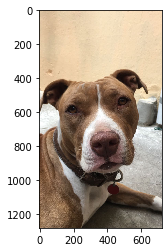

In [ ]:
img_test = imio.imread('./data/test/test2.jpg')
plt.imshow(img_test)

In [ ]:
## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: american_staffordshire_terrier #
predict_image = test_features[1]
